In [20]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
glass=pd.read_csv('/content/glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
#checking null values
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
#checking duplicated values
glass.duplicated().sum()

1

In [8]:
#droping the Duplicated value
glass.drop_duplicates(inplace=True)

In [9]:
glass.duplicated().sum()

0

In [10]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


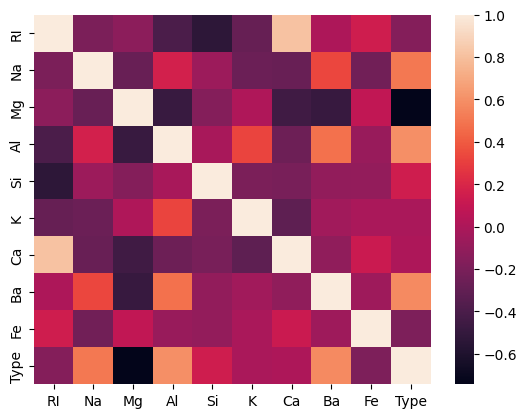

In [11]:
sns.heatmap(glass.corr())
plt.show()

In [14]:
glass.shape

(213, 10)

In [15]:
#splitting the data
X=glass.iloc[:,:9]
y=glass.iloc[:,-1]

In [16]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

## **Preparing a model for glass classification using KNN**

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [18]:
kfold=KFold(n_splits=10)

In [21]:
#finding best k value by using GridsearchCV model
from sklearn.model_selection import GridSearchCV

#initializing the KNeighborsClassifier model
knn=KNeighborsClassifier()

n=np.array(range(1,40))

param=dict(n_neighbors=n)

grid=GridSearchCV(estimator=knn,param_grid=param)

#fitting the data
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [22]:
#checking the best value
print(grid.best_score_)
print(grid.best_params_)

0.64828349944629
{'n_neighbors': 1}


### Visualizing the CV results

In [24]:
k_scores=[]

k_range=range(1,40)

for k in k_range:
  knn1=knn=KNeighborsClassifier(n_neighbors=k)
  resultd=cross_val_score(knn1,X,y,cv=10)
  k_scores.append(resultd.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

In [25]:
k_scores

[0.638961038961039,
 0.5967532467532467,
 0.6339826839826839,
 0.6244588744588745,
 0.6292207792207792,
 0.638961038961039,
 0.61991341991342,
 0.611038961038961,
 0.5876623376623378,
 0.6064935064935065,
 0.5971861471861473,
 0.6067099567099568,
 0.601948051948052,
 0.6064935064935065,
 0.6064935064935065,
 0.616017316017316,
 0.6110389610389612,
 0.6155844155844157,
 0.6158008658008659,
 0.6253246753246754,
 0.6158008658008659,
 0.6300865800865803,
 0.6207792207792208,
 0.6255411255411255,
 0.6257575757575757,
 0.6298701298701299,
 0.6205627705627706,
 0.6251082251082252,
 0.6203463203463204,
 0.6203463203463204,
 0.6108225108225108,
 0.6062770562770563,
 0.6062770562770563,
 0.6015151515151514,
 0.5967532467532467,
 0.591991341991342,
 0.5917748917748917,
 0.5826839826839827,
 0.5872294372294372]

<Axes: >

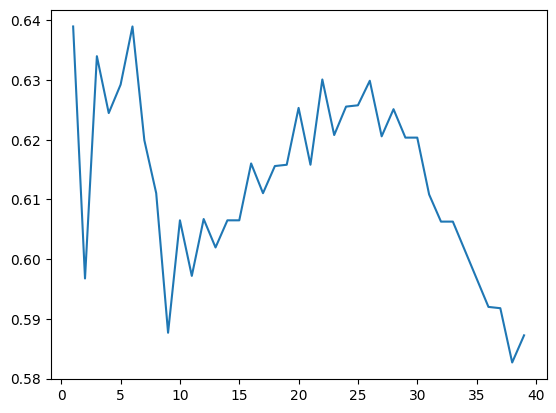

In [26]:
sns.lineplot(x=k_range,y=k_scores)

In [27]:
results_final=pd.DataFrame({"k_value":k_range,"k_score":k_scores})

In [28]:
results_final

,k_value,k_score
0,1,0.638961
1,2,0.596753
2,3,0.633983
3,4,0.624459
4,5,0.629221
5,6,0.638961
6,7,0.619913
7,8,0.611039
8,9,0.587662
9,10,0.606494
